<a href="https://colab.research.google.com/github/Vishnu-MLOps/Drone-Data-Semantic-Segmentation/blob/main/Drone_data_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("santurini/semantic-segmentation-drone-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.83G/4.83G [02:10<00:00, 39.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2


In [ ]:
!ls '/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2'

binary_dataset	classes_dataset  classes_dict.txt  colormaps.xlsx  semantic_drone_dataset


Colormaps

In [ ]:
!ls '/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/colormaps.xlsx'

/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/colormaps.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/colormaps.xlsx')
df.head()

,Classes,R,G,B,Id,Unnamed: 5,Classes.1,R.1,G.1,B.1,Id.1,Unnamed: 11,Classes.2,R.2,G.2,B.2,Id.2
0,unlabeled,0,0,0,0,NaN,obstacles,155.0,38.0,182.0,0.0,NaN,obstacles,204.0,153.0,255.0,0.0
1,paved-area,128,64,128,1,NaN,water,14.0,135.0,204.0,1.0,NaN,landing-zones,14.0,135.0,204.0,1.0
2,dirt,130,76,0,2,NaN,soft-surfaces,124.0,252.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,grass,0,102,0,3,NaN,moving-objects,255.0,20.0,147.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,gravel,112,103,87,4,NaN,landing-zones,169.0,169.0,169.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sem_df = df.drop(['Unnamed: 5', 'Classes', 'R', 'G', 'B', 'Id', 'Unnamed: 11', 'Classes.2', 'R.2', 'G.2', 'G.2', 'Id.2'], axis='columns')
sem_df

,Classes.1,R.1,G.1,B.1,Id.1,B.2
0,obstacles,155.0,38.0,182.0,0.0,255.0
1,water,14.0,135.0,204.0,1.0,204.0
2,soft-surfaces,124.0,252.0,0.0,2.0,NaN
3,moving-objects,255.0,20.0,147.0,3.0,NaN
4,landing-zones,169.0,169.0,169.0,4.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


Classes Dictionary

In [ ]:
with open ('/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/classes_dict.txt', 'r') as f:
  print(f.read())

binary_classes = {
	0: {0, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20},
	1: {1, 2, 3, 4, 9}
}

grouped_classes = {
         0: {0, 6, 10, 11, 12, 13, 14, 21, 22, 23}, # --> 0: [155,38,182], 'obstacles'
         1: {5, 7}, # --> 1: [14,135,204], 'water'
         2: {2, 3, 8, 19, 20}, # --> 2: [124,252,0], 'nature'
         3: {15, 16, 17, 18}, # --> 3: [255,20,147], 'moving'
         4: {1, 4, 9} # --> 4: [169,169,169], 'landable'
}


Semantic Drone Dataset


In [ ]:
!ls '/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/semantic_drone_dataset/semantic_drone_dataset'

label_images_semantic  original_images


In [ ]:
#598 .jpg files
import glob

drone_original_path = '/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/semantic_drone_dataset/semantic_drone_dataset/original_images'
no_orig = glob.glob('/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/semantic_drone_dataset/semantic_drone_dataset/original_images/*jpg')
len(no_orig)

400

In [ ]:
#598 .png files
drone_semantic_path =  '/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/semantic_drone_dataset/semantic_drone_dataset/label_images_semantic'
no_sem = glob.glob('/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/semantic_drone_dataset/semantic_drone_dataset/label_images_semantic/*png')
len(no_sem)

400

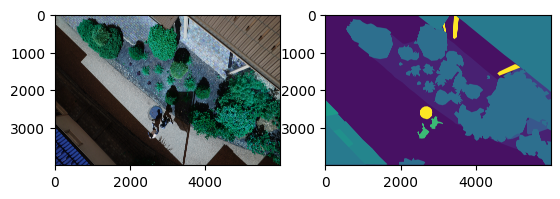

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

img_598 = cv2.imread('/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/semantic_drone_dataset/semantic_drone_dataset/original_images/598.jpg')
ann_598 = Image.open('/root/.cache/kagglehub/datasets/santurini/semantic-segmentation-drone-dataset/versions/2/semantic_drone_dataset/semantic_drone_dataset/label_images_semantic/598.png')
plt.subplot(1, 2, 1)
plt.imshow(img_598)
plt.subplot(1, 2, 2)
plt.imshow(ann_598)

There are only 400 images in each set

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from torch.utils.data import Dataset
import torchvision
from torch.utils.data import  DataLoader
from torchvision.transforms import transforms
import numpy as np

class GetImage(Dataset):
  def __init__(self, img_path, ann_path):
    self.imgs_path = img_path
    self.anns_path = ann_path
    self.transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

  def __len__(self):
    return len(self.imgs_path)

  def __getitem__(self, idx):
    image = self.imgs_path[idx]
    seg = self.anns_path[idx]
    image = cv2.imread(image)
    image= cv2.resize(image, (224, 224))
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = self.transform(image)
    image = image/255.
    seg = Image.open(seg)
    seg = seg.resize((224, 224))
    seg = torch.Tensor(np.array(seg))
    #seg = self.transform(seg)
    seg = seg/255.

    return image.float().to(device), seg.long().to(device)

  def collate_fn(self, batch):
    images, labels = list(zip(*batch))
    images = torch.stack(images, dim=0)
    labels = torch.stack(labels, dim=0)
    return images.float().to(device), labels.long().to(device)

In [ ]:
train_ds = GetImage(no_orig[:350], no_sem[:350])
val_ds = GetImage(no_orig[350:], no_sem[350:])

train_dl = DataLoader(train_ds, batch_size=4, shuffle=True, collate_fn=train_ds.collate_fn, drop_last=True)
test_dl = DataLoader(val_ds, batch_size=1, shuffle=False, collate_fn=train_ds.collate_fn, drop_last=False)

In [ ]:
from torchvision.models import vgg16_bn
import torch.nn as nn

def conv(in_channels, out_channels):
  return nn.Sequential(
      nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(out_channels),
      nn.ReLU(inplace=True)
  )

def up_conv(in_channels, out_channels):
  return nn.Sequential(
      nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
      nn.ReLU(inplace=True)
  )

class UNet(nn.Module):
  def __init__(self, out_channels=5):
    super().__init__()
    self.encoder = vgg16_bn(pretrained=True).features
    self.block1 = nn.Sequential(*self.encoder[:6])
    self.block2 = nn.Sequential(*self.encoder[6:13])
    self.block3 = nn.Sequential(*self.encoder[13:20])
    self.block4 = nn.Sequential(*self.encoder[20:27])
    self.block5 = nn.Sequential(*self.encoder[27:34])
    self.bottleneck = nn.Sequential(*self.encoder[34:])

    self.conv_bottleneck = conv(512, 1024)
    self.up_conv6 = up_conv(1024, 512)
    self.conv6 = conv(512+512, 512)
    self.up_conv7 = up_conv(512, 256)
    self.conv7 = conv(256+512, 256)
    self.up_conv8 = up_conv(256, 128)
    self.conv8 = conv(128+256, 128) # Fixed: Added self.conv8
    self.up_conv9 = up_conv(128, 64)
    self.conv9 = conv(64+128, 64)
    self.up_conv10 = up_conv(64, 32)
    self.conv10 = conv(32+64, 32)
    self.conv11 = conv(32, out_channels)

  def forward(self, x):
    block1= self.block1(x)
    block2 = self.block2(block1)
    block3 = self.block3(block2)
    block4 = self.block4(block3)
    block5 = self.block5(block4)
    bottleneck = self.bottleneck(block5)
    x = self.conv_bottleneck(bottleneck)

    x = self.up_conv6(x)
    x = torch.cat([x, block5], dim=1)
    x = self.conv6(x)

    x = self.up_conv7(x)
    x = torch.cat([x, block4], dim=1)
    x = self.conv7(x)

    x = self.up_conv8(x)
    x = torch.cat([x, block3], dim=1)
    x = self.conv8(x)

    x = self.up_conv9(x)
    x = torch.cat([x, block2], dim=1)
    x = self.conv9(x)

    x = self.up_conv10(x)
    x = torch.cat([x, block1], dim=1)
    x = self.conv10(x)

    x = self.conv11(x)

    return x

In [ ]:
ce = nn.CrossEntropyLoss()
def UNetLoss(pred, target):
  ce_loss = ce(pred, target)
  acc = (torch.max(pred, 1)[1] == target).float().mean()
  return ce_loss, acc

In [ ]:
import torch.optim as optim

model = UNet(out_channels=5).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
def train_batch(model, data, optimizer, criterion):
  model.train()
  optimizer.zero_grad()
  images, segmentations = data
  preds = model(images)
  loss, acc = criterion(preds, segmentations)
  loss.backward()
  optimizer.step()
  return loss.item(), acc

@torch.no_grad()
def validate_batch(model, data, criterion):
  model.eval()
  images, segmentations = data
  preds = model(images)
  loss, acc = criterion(preds, segmentations)
  return loss.item() , acc

In [ ]:
from tqdm import tqdm

epoch_train_losses, epoch_train_accuracies = [], []
epoch_validation_losses, epoch_validation_accuracies = [], []
epochs = 20
for i in range(epochs):
  print(f'Epoch {i+1}|{epochs}')
  train_losses = 0
  train_accuracies = 0
  for batch in tqdm(train_dl):
    train_loss, train_acc = train_batch(model, batch, optimizer, UNetLoss)
    train_losses += train_loss
    train_accuracies += train_acc
  train_l = train_losses / len(train_dl)
  train_a = train_accuracies / len(train_dl)
  epoch_train_losses.append(train_l)
  epoch_train_accuracies.append(train_a)
  print(f'Training loss in epoch {i+1}: {train_l}')

  validation_losses, validation_accuracies = 0, 0
  for batch in tqdm(test_dl):
    val_loss, val_acc = validate_batch(model, batch, UNetLoss)
    validation_losses += val_loss
    validation_accuracies += val_acc
  val_l = validation_losses / len(test_dl)
  val_a = validation_accuracies / len(test_dl)
  epoch_validation_losses.append(val_l)
  epoch_validation_accuracies.append(val_a)
  print(f'Validation loss in epoch {i+1 }: {val_l}')

Epoch 1|20


100%|██████████| 87/87 [02:50<00:00,  1.96s/it]


Training loss in epoch 1: 1.2965690842990218


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


Validation loss in epoch 1: 1.4567100024223327
Epoch 2|20


100%|██████████| 87/87 [02:50<00:00,  1.96s/it]


Training loss in epoch 2: 1.1726546931540829


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 2: 1.1899828493595124
Epoch 3|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 3: 1.1117124694517289


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 3: 1.054963936805725
Epoch 4|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 4: 1.0537017501633743


100%|██████████| 50/50 [00:24<00:00,  2.08it/s]


Validation loss in epoch 4: 1.0471364200115203
Epoch 5|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 5: 0.9979125412031152


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 5: 0.9591896784305572
Epoch 6|20


100%|██████████| 87/87 [02:48<00:00,  1.94s/it]


Training loss in epoch 6: 0.9451900748000748


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 6: 0.8709978473186493
Epoch 7|20


100%|██████████| 87/87 [02:48<00:00,  1.94s/it]


Training loss in epoch 7: 0.894976487790031


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 7: 0.9994269192218781
Epoch 8|20


100%|██████████| 87/87 [02:49<00:00,  1.94s/it]


Training loss in epoch 8: 0.8471111689490833


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 8: 0.6816476106643676
Epoch 9|20


100%|██████████| 87/87 [02:48<00:00,  1.94s/it]


Training loss in epoch 9: 0.8015733655841871


100%|██████████| 50/50 [00:23<00:00,  2.09it/s]


Validation loss in epoch 9: 1.0178430318832397
Epoch 10|20


100%|██████████| 87/87 [02:48<00:00,  1.94s/it]


Training loss in epoch 10: 0.7592356931204083


100%|██████████| 50/50 [00:23<00:00,  2.16it/s]


Validation loss in epoch 10: 0.7454925167560578
Epoch 11|20


100%|██████████| 87/87 [02:50<00:00,  1.96s/it]


Training loss in epoch 11: 0.7185254597115791


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


Validation loss in epoch 11: 0.9951651024818421
Epoch 12|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 12: 0.6803186398813095


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


Validation loss in epoch 12: 0.5908036613464356
Epoch 13|20


100%|██████████| 87/87 [02:50<00:00,  1.96s/it]


Training loss in epoch 13: 0.6449312416986487


100%|██████████| 50/50 [00:23<00:00,  2.13it/s]


Validation loss in epoch 13: 0.5430576860904693
Epoch 14|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 14: 0.6121530135472616


100%|██████████| 50/50 [00:24<00:00,  2.07it/s]


Validation loss in epoch 14: 0.5846380347013473
Epoch 15|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 15: 0.5801320404841982


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 15: 0.6145234662294388
Epoch 16|20


100%|██████████| 87/87 [02:49<00:00,  1.94s/it]


Training loss in epoch 16: 0.5501902473383936


100%|██████████| 50/50 [00:23<00:00,  2.15it/s]


Validation loss in epoch 16: 0.6785879963636399
Epoch 17|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 17: 0.5226152833850904


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]


Validation loss in epoch 17: 0.4900743800401688
Epoch 18|20


100%|██████████| 87/87 [02:49<00:00,  1.95s/it]


Training loss in epoch 18: 0.4962473713803565


100%|██████████| 50/50 [00:23<00:00,  2.17it/s]


Validation loss in epoch 18: 0.5351859551668167
Epoch 19|20


100%|██████████| 87/87 [02:52<00:00,  1.98s/it]


Training loss in epoch 19: 0.4719744410323001


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 19: 0.4834474861621857
Epoch 20|20


100%|██████████| 87/87 [02:48<00:00,  1.94s/it]


Training loss in epoch 20: 0.44739485129542733


100%|██████████| 50/50 [00:23<00:00,  2.13it/s]

Validation loss in epoch 20: 0.410124214887619


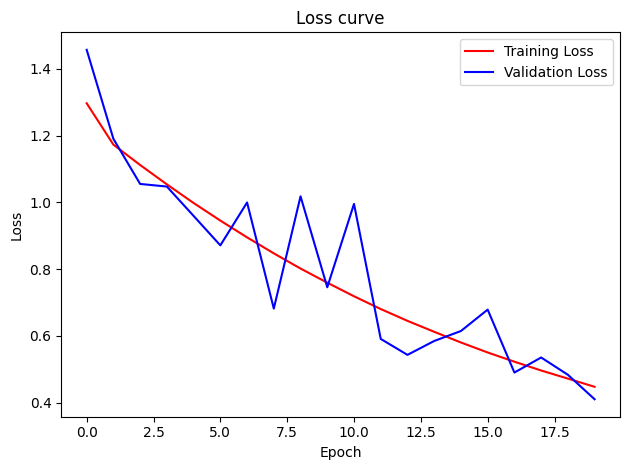

In [ ]:
import seaborn as sns

plt.title('Loss curve')
sns.lineplot(x=range(epochs), y=epoch_train_losses, label='Training Loss', color = 'red')
sns.lineplot(x=range(epochs), y=epoch_validation_losses, label='Validation Loss', color = 'blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

In [ ]:
from tqdm import tqdm

epoch_train_losses, epoch_train_accuracies = [], []
epoch_validation_losses, epoch_validation_accuracies = [], []
epochs = 15
for i in range(epochs):
  print(f'Epoch {20+i}|{20 + epochs}')
  train_losses = 0
  train_accuracies = 0
  for batch in tqdm(train_dl):
    train_loss, train_acc = train_batch(model, batch, optimizer, UNetLoss)
    train_losses += train_loss
    train_accuracies += train_acc
  train_l = train_losses / len(train_dl)
  train_a = train_accuracies / len(train_dl)
  epoch_train_losses.append(train_l)
  epoch_train_accuracies.append(train_a)
  print(f'Training loss in epoch {20+i}: {train_l}')

  validation_losses, validation_accuracies = 0, 0
  for batch in tqdm(test_dl):
    val_loss, val_acc = validate_batch(model, batch, UNetLoss)
    validation_losses += val_loss
    validation_accuracies += val_acc
  val_l = validation_losses / len(test_dl)
  val_a = validation_accuracies / len(test_dl)
  epoch_validation_losses.append(val_l)
  epoch_validation_accuracies.append(val_a)
  print(f'Validation loss in epoch {20+i}: {val_l}')

Epoch 20|35


100%|██████████| 87/87 [03:08<00:00,  2.17s/it]


Training loss in epoch 20: 0.42469234370637216


100%|██████████| 50/50 [00:25<00:00,  1.94it/s]


Validation loss in epoch 20: 0.3436672365665436
Epoch 21|35


100%|██████████| 87/87 [02:59<00:00,  2.07s/it]


Training loss in epoch 21: 0.40393821158628357


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]


Validation loss in epoch 21: 0.5483047103881836
Epoch 22|35


 82%|████████▏ | 71/87 [02:18<00:33,  2.08s/it]